In [1]:
# Run this again after editing submodules so Colab uses the updated versions
from citylearn import  CityLearn
from pathlib import Path
from agent import Agent
from copy import deepcopy
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


import matplotlib.pyplot as plt


import utils
import time

import numpy as np    
import pandas as pd
import torch

# Load environment
climate_zone = 5
params = {'data_path':Path("data/Climate_Zone_"+str(climate_zone)), 
        'building_attributes':'building_attributes.json', 
        'weather_file':'weather_data.csv', 
        'solar_profile':'solar_generation_1kW.csv', 
        'carbon_intensity':'carbon_intensity.csv',
        'building_ids':["Building_"+str(i) for i in [1,2,3,4,5,6,7,8,9]],
        'buildings_states_actions':'buildings_state_action_space.json', 
        'simulation_period': (0, 8760*4-1), 
        'cost_function': ['ramping','1-load_factor','average_daily_peak','peak_demand','net_electricity_consumption','carbon_emissions'], 
        'central_agent': False,
        'save_memory': False }

# Contain the lower and upper bounds of the states and actions, to be provided to the agent to normalize the variables between 0 and 1.
env = CityLearn(**params)
observations_spaces, actions_spaces = env.get_state_action_spaces()

# Provides information on Building type, Climate Zone, Annual DHW demand, Annual Cooling Demand, Annual Electricity Demand, Solar Capacity, and correllations among buildings
building_info = env.get_building_information()


params_agent = {'building_ids':["Building_"+str(i) for i in [1,2,3,4,5,6,7,8,9]],
                 'buildings_states_actions':'buildings_state_action_space.json', 
                 'building_info':building_info,
                 'observation_space':observations_spaces, 
                 'action_spaces':actions_spaces}

# Instantiating the control agent(s)
agents = Agent(**params_agent)

RBC_THRESHOLD = 24*14
# agents = Agent(
#     num_actions=actions_spaces,
#     num_buildings=len(observations_spaces),
#     env = env, is_oracle = False,
# )

state = env.reset()
done = False

action = agents.select_action(state, False)
costs_peak_net_ele = []

t_idx = 0
# run for a month - NOTE: THIS WILL TAKE ~2 HOURS TO RUN. reduce `end_time` for quicker results.
end_time = RBC_THRESHOLD + 24 * 365

start_time = time.time()



# returns E_grid for RBC agent
E_grid_RBC = utils.RBC(actions_spaces).get_rbc_data(
    deepcopy(env), state, end_time)
E_grid_RBC = np.array(E_grid_RBC)

E_grid_true = []  # see comments below for more info.

while not done and env.time_step < end_time:

    next_state, reward, done, _ = env.step(action)
    action_next = agents.select_action(
        next_state, False
    )  # passing in environment for Oracle agent.

#     agents.add_to_buffer_oracle(state, env, action, reward, next_state)
    agents.add_to_buffer(state, action, reward, next_state, done)
    ## add env E-grid
    E_grid_true.append([x[28] for x in state])
    state = next_state
    action = action_next

    t_idx += 1

    print(f"\rTime step: {t_idx}", end="")

print(
    f"Total time (min) to run {end_time // 24} days of simulation: {round((time.time() - start_time) / 60, 3)}"
)

Time step: 1793
Solving using SCS at t = 18 for building 3
Time step: 1794
Solving using SCS at t = 19 for building 3
Time step: 2407
Solving using SCS at t = 8 for building 3
Time step: 2451
Solving using SCS at t = 4 for building 3
Time step: 2452
Solving using SCS at t = 5 for building 3
Time step: 2472
Solving using SCS at t = 1 for building 3
Time step: 2473
Solving using SCS at t = 2 for building 3
Time step: 2474
Solving using SCS at t = 3 for building 3
Time step: 2504
Solving using SCS at t = 9 for building 3
Time step: 2525
Solving using SCS at t = 6 for building 3
Time step: 2551
Solving using SCS at t = 8 for building 3
Time step: 2552
Solving using SCS at t = 9 for building 3
Time step: 2573
Solving using SCS at t = 6 for building 3
Time step: 2574
Solving using SCS at t = 7 for building 3
Time step: 2576
Solving using SCS at t = 9 for building 3
Time step: 2577
Solving using SCS at t = 10 for building 3
Time step: 2578
Solving using SCS at t = 11 for building 3
Time step:

Time step: 2885
Solving using SCS at t = 6 for building 3
Time step: 2886
Solving using SCS at t = 7 for building 3
Time step: 2887
Solving using SCS at t = 8 for building 3
Time step: 2888
Solving using SCS at t = 9 for building 3
Time step: 2889
Solving using SCS at t = 10 for building 3
Time step: 2892
Solving using SCS at t = 13 for building 3
Time step: 2893
Solving using SCS at t = 14 for building 3
Time step: 2902
Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3
Time step: 2903
Solving using SCS at t = 0 for building 3
Time step: 2912
Solving using SCS at t = 9 for building 3
Time step: 2913
Solving using SCS at t = 10 for building 3
Time step: 2914
Solving using SCS at t = 11 for building 3
Time step: 2926
Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 

Time step: 3086
Solving using SCS at t = 15 for building 3
Time step: 3087
Solving using SCS at t = 16 for building 3
Time step: 3090
Solving using SCS at t = 19 for building 3
Time step: 3091
Solving using SCS at t = 20 for building 3
Time step: 3094
Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3
Time step: 3095
Solving using SCS at t = 0 for building 3
Time step: 3096
Solving using SCS at t = 1 for building 3
Time step: 3097
Solving using SCS at t = 2 for building 3
Time step: 3098
Solving using SCS at t = 3 for building 3
Time step: 3099
Solving using SCS at t = 4 for building 3
Time step: 3100
Solving using SCS at t = 5 for building 3
Time step: 3101
Solving using SCS at t = 6 for building 3
Time step: 3102
Solving using SCS at t = 7 for building 3
Time step: 3103
Solving using SCS at t = 8 for building 3
Time step: 3104
Solving using SCS at t = 9 for building

Time step: 3264
Solving using SCS at t = 1 for building 3
Time step: 3265
Solving using SCS at t = 2 for building 3
Time step: 3266
Solving using SCS at t = 3 for building 3
Time step: 3267
Solving using SCS at t = 4 for building 3
Time step: 3268
Solving using SCS at t = 5 for building 3
Time step: 3269
Solving using SCS at t = 6 for building 3
Time step: 3270
Solving using SCS at t = 7 for building 3
Time step: 3271
Solving using SCS at t = 8 for building 3
Time step: 3272
Solving using SCS at t = 9 for building 3
Time step: 3273
Solving using SCS at t = 10 for building 3
Time step: 3274
Solving using SCS at t = 11 for building 3
Time step: 3275
Solving using SCS at t = 12 for building 3
Time step: 3276
Solving using SCS at t = 13 for building 3
Time step: 3277
Solving using SCS at t = 14 for building 3
Time step: 3278
Solving using SCS at t = 15 for building 3
Time step: 3279
Solving using SCS at t = 16 for building 3
Time step: 3282
Solving using SCS at t = 19 for building 3
Time s

Time step: 3430
Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3
Time step: 3431
Solving using SCS at t = 0 for building 3
Time step: 3432
Solving using SCS at t = 1 for building 3
Time step: 3433
Solving using SCS at t = 2 for building 3
Time step: 3434
Solving using SCS at t = 3 for building 3
Time step: 3435
Solving using SCS at t = 4 for building 3
Time step: 3436
Solving using SCS at t = 5 for building 3
Time step: 3437
Solving using SCS at t = 6 for building 3
Time step: 3438
Solving using SCS at t = 7 for building 3
Time step: 3439
Solving using SCS at t = 8 for building 3
Time step: 3440
Solving using SCS at t = 9 for building 3
Time step: 3441
Solving using SCS at t = 10 for building 3
Time step: 3442
Solving using SCS at t = 11 for building 3
Time step: 3443
Solving using SCS at t = 12 for building 3
Time step: 3444
Solving using SCS at t = 13 for building


Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3
Time step: 3623
Solving using SCS at t = 0 for building 3
Time step: 3624
Solving using SCS at t = 1 for building 3
Time step: 3625
Solving using SCS at t = 2 for building 3
Time step: 3626
Solving using SCS at t = 3 for building 3
Time step: 3627
Solving using SCS at t = 4 for building 3
Time step: 3628
Solving using SCS at t = 5 for building 3
Time step: 3629
Solving using SCS at t = 6 for building 3
Time step: 3630
Solving using SCS at t = 7 for building 3
Time step: 3631
Solving using SCS at t = 8 for building 3
Time step: 3632
Solving using SCS at t = 9 for building 3
Time step: 3633
Solving using SCS at t = 10 for building 3
Time step: 3634
Solving using SCS at t = 11 for building 3
Time step: 3635
Solving using SCS at t = 12 for building 3
Time step: 3636
Solving using SCS at t = 13 for building 3
Time step: 3637
Solving using SCS at t = 14 for building 3
Time step: 3638
Solving using SCS at t 

Time step: 3838
Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3
Time step: 3839
Solving using SCS at t = 0 for building 3
Time step: 3840
Solving using SCS at t = 1 for building 3
Time step: 3841
Solving using SCS at t = 2 for building 3
Time step: 3842
Solving using SCS at t = 3 for building 3
Time step: 3843
Solving using SCS at t = 4 for building 3
Time step: 3844
Solving using SCS at t = 5 for building 3
Time step: 3845
Solving using SCS at t = 6 for building 3
Time step: 3846
Solving using SCS at t = 7 for building 3
Time step: 3847
Solving using SCS at t = 8 for building 3
Time step: 3848
Solving using SCS at t = 9 for building 3
Time step: 3849
Solving using SCS at t = 10 for building 3
Time step: 3850
Solving using SCS at t = 11 for building 3
Time step: 3851
Solving using SCS at t = 12 for building 3
Time step: 3852
Solving using SCS at t = 13 for building

Time step: 4761
Solving using SCS at t = 10 for building 3
Time step: 4762
Solving using SCS at t = 11 for building 3
Time step: 4763
Solving using SCS at t = 12 for building 3
Time step: 4764
Solving using SCS at t = 13 for building 3
Time step: 4765
Solving using SCS at t = 14 for building 3
Time step: 4766
Solving using SCS at t = 15 for building 3
Time step: 4767
Solving using SCS at t = 16 for building 3
Time step: 4768
Solving using SCS at t = 17 for building 3
Time step: 4775
Solving using SCS at t = 0 for building 3
Time step: 4776
Solving using SCS at t = 1 for building 3
Time step: 4777
Solving using SCS at t = 2 for building 3
Time step: 4778
Solving using SCS at t = 3 for building 3
Time step: 4779
Solving using SCS at t = 4 for building 3
Time step: 4780
Solving using SCS at t = 5 for building 3
Time step: 4781
Solving using SCS at t = 6 for building 3
Time step: 4782
Solving using SCS at t = 7 for building 3
Time step: 4783
Solving using SCS at t = 8 for building 3
Time s

Time step: 5557
Solving using SCS at t = 14 for building 3
Time step: 5558
Solving using SCS at t = 15 for building 3
Time step: 5559
Solving using SCS at t = 16 for building 3
Time step: 5560
Solving using SCS at t = 17 for building 3
Time step: 5566
Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3
Time step: 5567
Solving using SCS at t = 0 for building 3
Time step: 5568
Solving using SCS at t = 1 for building 3
Time step: 5569
Solving using SCS at t = 2 for building 3
Time step: 5570
Solving using SCS at t = 3 for building 3
Time step: 5571
Solving using SCS at t = 4 for building 3
Time step: 5572
Solving using SCS at t = 5 for building 3
Time step: 5573
Solving using SCS at t = 6 for building 3
Time step: 5574
Solving using SCS at t = 7 for building 3
Time step: 5575
Solving using SCS at t = 8 for building 3
Time step: 5576
Solving using SCS at t = 9 for building

Time step: 5991
Solving using SCS at t = 16 for building 3
Time step: 5992
Solving using SCS at t = 17 for building 3
Time step: 5998
Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3
Time step: 6000
Solving using SCS at t = 1 for building 3
Time step: 6001
Solving using SCS at t = 2 for building 3
Time step: 6002
Solving using SCS at t = 3 for building 3
Time step: 6003
Solving using SCS at t = 4 for building 3
Time step: 6004
Solving using SCS at t = 5 for building 3
Time step: 6005
Solving using SCS at t = 6 for building 3
Time step: 6014
Solving using SCS at t = 15 for building 3
Time step: 6015
Solving using SCS at t = 16 for building 3
Time step: 6016
Solving using SCS at t = 17 for building 3
Time step: 6024
Solving using SCS at t = 1 for building 3
Time step: 6025
Solving using SCS at t = 2 for building 3
Time step: 6026
Solving using SCS at t = 3 for buildin

Time step: 6366
Solving using SCS at t = 7 for building 3
Time step: 6367
Solving using SCS at t = 8 for building 3
Time step: 6368
Solving using SCS at t = 9 for building 3
Time step: 6369
Solving using SCS at t = 10 for building 3
Time step: 6370
Solving using SCS at t = 11 for building 3
Time step: 6371
Solving using SCS at t = 12 for building 3
Time step: 6372
Solving using SCS at t = 13 for building 3
Time step: 6373
Solving using SCS at t = 14 for building 3
Time step: 6374
Solving using SCS at t = 15 for building 3
Time step: 6375
Solving using SCS at t = 16 for building 3
Time step: 6376
Solving using SCS at t = 17 for building 3
Time step: 6382
Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3
Time step: 6383
Solving using SCS at t = 0 for building 3
Time step: 6384
Solving using SCS at t = 1 for building 3
Time step: 6385
Solving using SCS at t = 2 for buil

Time step: 6568
Solving using SCS at t = 17 for building 3
Time step: 6574
Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3

Solving using SCS at t = 0 for building 3
Time step: 6575
Solving using SCS at t = 0 for building 3
Time step: 6576
Solving using SCS at t = 1 for building 3
Time step: 6577
Solving using SCS at t = 2 for building 3
Time step: 6578
Solving using SCS at t = 3 for building 3
Time step: 6579
Solving using SCS at t = 4 for building 3
Time step: 6580
Solving using SCS at t = 5 for building 3
Time step: 6581
Solving using SCS at t = 6 for building 3
Time step: 6582
Solving using SCS at t = 7 for building 3
Time step: 6583
Solving using SCS at t = 8 for building 3
Time step: 6584
Solving using SCS at t = 9 for building 3
Time step: 6585
Solving using SCS at t = 10 for building 3
Time step: 6586
Solving using SCS at t = 11 for building 3
Time step: 6587
Solving using SCS at t = 12 for building

In [2]:
agents.memory.get(-1)["C_p_Csto"].shape

(24, 9)

In [3]:
np.shape(agents.costs)

(5, 1, 9)

In [4]:
x = agents.logger

In [5]:
e_grid = []

for h in x:
    l = []
    for bid in h:
        l.append(bid["E_grid"] + bid["E_grid_sell"])
    e_grid.append(l)
e_grid = np.array(e_grid)[:-1]

In [6]:
tmp_e_grid_true = np.array(E_grid_true[RBC_THRESHOLD:])
tmp_rbc_e_grid = np.array(E_grid_RBC[RBC_THRESHOLD:])

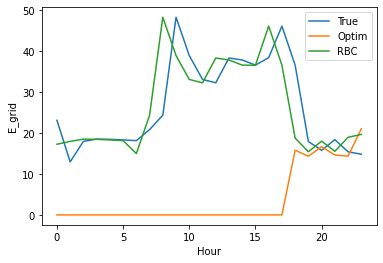

In [7]:
plt.plot(tmp_e_grid_true[:, 0][-24:], label='True')
plt.plot(e_grid[:, 0][-24:], label='Optim')
plt.plot(tmp_rbc_e_grid[:, 0][-24:], label='RBC')
plt.legend()
plt.xlabel("Hour")
plt.ylabel("E_grid")
plt.show()

In [8]:
vars_RL = agents.logger
# print(len(vars_RL))
# print(RBC_THRESHOLD)

time_RBC = int(RBC_THRESHOLD/24)
time_sim = int(end_time/24) - time_RBC  # Number of days simulation
time_end = time_sim + time_RBC
print(time_RBC)
print(time_sim)
print(time_end)

# print(np.shape(agents.all_costs))

all_costs = agents.all_costs

all_costs = np.mean(all_costs, axis = 2)

# print(np.shape(all_costs))

p_ele_data = np.array(agents.p_ele_logger)

# print(np.shape(p_ele_data))
# p_ele_data = agents.p_ele_logger.reshape(len(vars_RL)*1*24,9)
# print(np.shape(agents.p_ele_logger))

def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis', aspect = 'auto')
    plt.title('Heatmap Building 4')
    plt.xlabel('days')
    plt.ylabel('hours')
    plt.colorbar()
    plt.show()

# p_ele_data = p_ele_data[:-1,:,:,3]    # Getting data for a certain building 
print(np.shape(p_ele_data))

# p_ele_data = p_ele_data.reshape(time_end, 24)

# plt.figure(figsize = (20,10))
# heatmap2d(p_ele_data[0:100,:].T)

# print(p_ele_data[1,:])
# print(all_costs)



14
365
379
(9097, 1, 24, 9)


(8761, 9)
8761


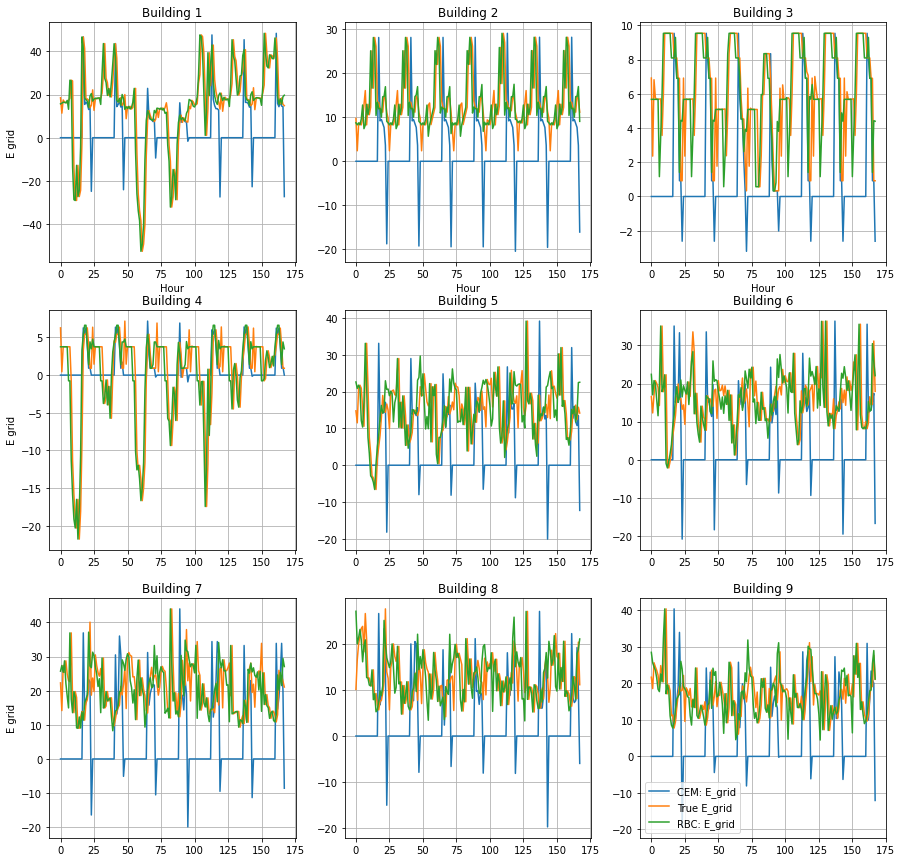

In [9]:
############## TODO: ENTER CODE HERE ##############

# list of dictionary of variables generated from RL. See actor.py#L166 for relevant variable names. eg. vars_RL[0]['E_grid']
# NOTE: dimensions of RL/NORL logger is ≠ RBC. This is because RL/NORL implicitly uses RBC. We only start collecting data from
# RL/NORL once it starts making inference, i.e, after `rbc_threshold`. Tweak the parameter above!


vars_RL = agents.logger
print(np.shape(vars_RL))
print(len(vars_RL))


# list of dictionary of variables generated NORL - Optim w/o any RL. See actor.py#L166 for relevant variable names. eg. vars_RL[0]['E_grid']
# vars_NORL = agents.norl_logger

# true E-grid values. NOTE: E_grid = E_grid_true. E_grid_pred = var["E_grid"] for RL/Optim
E_grid_true = np.array(E_grid_true)

# E_grid net electricity consumption per building using RBC
E_grid_RBC = np.array(E_grid_RBC)

############## TODO: ENTER CODE HERE ##############


# vars_RL = np.array(vars_RL)  # DImension - No.of days
# RL_SOC_C = np.flatten(vars_RL[:]['SOC_C']).reshape(24*30,9)
# RL_SOC_C.append(vars_RL[i]['SOC_C'])

# #If indexing error, use the for loop
# RL_SOC_C.append( vars_RL[i][key] )
# RL_SOC_C = np.array(RL_SOC_C).flatten().reshape(days * 24, 9)


# vars_A, vars_B, ..., vars_Z = [], [], ..., [] # RL
# vars_A, vars_B, ..., vars_Z = [], [], ..., [] # NORL  #Already Defined

# 1. RBC Agent
RBC_actions_arr = []
RBC_look_ahead_cost = []  
RBC_E_grid_pred = []
RBC_E_grid_sell = []
RBC_E_hpC = []
RBC_E_ehH = []
RBC_Edhw = []
RBC_SOC_bat = []
RBC_SOC_C = []
RBC_SOC_H = []
RBC_C_p_bat = []
RBC_C_p_Csto = []
RBC_C_p_Hsto = []
RBC_ramping_cost = []
RBC_peak_electricity_cost = []
RBC_total_cost = []
RBC_action_C = []
RBC_action_H = []
RBC_action_bat = []

# 2. RL Agent
RL_actions_arr = []
RL_look_ahead_cost = [] 
RL_E_grid_sell = []
RL_E_grid_pred = []
RL_E_hpC = []
RL_E_ehH = []
RL_Edhw = []
RL_SOC_bat = []
RL_SOC_H = []
RL_SOC_C = []
RL_C_p_bat = []
RL_C_p_Csto = []
RL_C_p_Hsto = []
RL_ramping_cost = []
RL_peak_electricity_cost = []
RL_total_cost = []
RL_action_C = []
RL_action_H = []
RL_action_bat = []

# 3. NO RL Agent (Just Optimization)
# NORL_actions_arr = []
# NORL_look_ahead_cost = []
# NORL_E_grid_sell = []
# Egrid = []  
# NORL_E_grid_pred = []
# NORL_E_hpC = []
# NORL_E_ehH = []
# NORL_Edhw = []
# NORL_SOC_bat = []
# NORL_SOC_C = []
# NORL_SOC_H = []
# NORL_C_p_bat = []
# NORL_C_p_Csto = []
# NORL_C_p_Hsto = []
# NORL_ramping_cost = []
# NORL_peak_electricity_cost = []
# NORL_total_cost = []
# NORL_action_C = []
# NORL_action_H = []
# NORL_action_bat = []


# keys = list("E_grid", "E_grid_sell", "E_hpC", "E_ehH", "SOC_bat", "SOC_H", "SOC_C", " action_bat", "action_H", "action_C") 



for i in range(len(vars_RL)): #number of days of RL/NORL
    for j in range (9):
#         print('i, j = ', i, j)
        RL_E_grid_pred.append(vars_RL[i][j]["E_grid"])
        RL_E_grid_sell.append(vars_RL[i][j]["E_grid_sell"])
        RL_E_hpC.append(vars_RL[i][j]["E_hpC"])
        RL_E_ehH.append(vars_RL[i][j]['E_ehH'])
        RL_SOC_bat.append(vars_RL[i][j]["SOC_bat"])
        RL_SOC_H.append(vars_RL[i][j]["SOC_H"])
        RL_SOC_C.append(vars_RL[i][j]["SOC_C"])
        RL_action_bat.append(vars_RL[i][j]["action_bat"])
        RL_action_C.append(vars_RL[i][j]["action_C"])
        RL_action_H.append(vars_RL[i][j]["action_H"])
        
    
#         NORL_E_grid_pred.append(vars_NORL[i][j]["E_grid"])
#         NORL_E_grid_sell.append(vars_NORL[i][j]["E_grid_sell"])
#         NORL_E_hpC.append(vars_NORL[i][j]["E_hpC"])
#         NORL_E_ehH.append(vars_NORL[i][j]["E_ehH"])
#         NORL_SOC_bat.append(vars_NORL[i][j]["SOC_bat"])
#         NORL_SOC_H.append(vars_NORL[i][j]["SOC_H"])
#         NORL_SOC_C.append(vars_NORL[i][j]["SOC_C"])
#         NORL_action_bat.append(vars_NORL[i][j]["action_bat"])
#         NORL_action_C.append(vars_NORL[i][j]["action_C"])
#         NORL_action_H.append(vars_NORL[i][j]["action_H"])



# ### flatten out to get hour per building

RL_E_grid_pred = np.array(RL_E_grid_pred).flatten().reshape(-1, 9) # hours x num_buildings
RL_E_grid_sell = np.array(RL_E_grid_sell).flatten().reshape(-1, 9) # hours x num_buildings

# RL_E_grid_pred = np.array(RL_E_grid_pred).flatten().reshape(len(vars_RL), 9) # hours x num_buildings
# RL_E_grid_sell = np.array(RL_E_grid_sell).flatten().reshape(len(vars_RL), 9) # hours x num_buildings
# RL_E_hpC = np.array(RL_E_hpC).flatten().reshape(len(vars_RL), 9) # hours x num_buildings
# RL_E_ehH = np.array(RL_E_ehH).flatten().reshape(len(vars_RL), 9) # hours x num_buildings
# RL_SOC_bat = np.array(RL_SOC_bat).flatten().reshape(len(vars_RL), 9) # hours x num_buildings
# RL_SOC_H = np.array(RL_SOC_H).flatten().reshape(len(vars_RL), 9) # hours x num_buildings
# RL_SOC_C = np.array(RL_SOC_C).flatten().reshape(len(vars_RL), 9) # hours x num_buildings
# RL_action_bat = np.array(RL_action_bat).flatten().reshape(len(vars_RL), 9) # hours x num_buildings
# RL_action_C = np.array(RL_action_C).flatten().reshape(len(vars_RL), 9) # hours x num_buildings
# RL_action_H = np.array(RL_action_H).flatten().reshape(len(vars_RL), 9) # hours x num_buildings

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for j in range(3):
        bid = i * 3 + j
        axs[i, j].set_title(f"Building {bid + 1}")
        axs[i, j].plot(
            RL_E_grid_pred[:,i*3+j][-168:] + RL_E_grid_sell[:,i*3+j][-169:-1], label="CEM: E_grid"
        )
        axs[i, j].plot(
            E_grid_true[RBC_THRESHOLD:,i*3+j][-168:], label="True E_grid"
        )  # plot true E grid
        axs[i, j].plot(
            E_grid_RBC[RBC_THRESHOLD:,i*3+j][-168:], label="RBC: E_grid"
        )  # plot true E grid
        axs[i, j].grid()
        if j == 0:
            axs[i, j].set_ylabel("E grid")
        if i == 0:
            axs[i, j].set_xlabel("Hour")



# # plot predicted E_grid
# # week = end_time - 24 * 3  # plots last week of the month data
# fig, axs = plt.subplots(3, 3, figsize=(15, 15))
# for i in range(3):
#     for j in range(3):
#         bid = i * 3 + j
# #         axs[i, j].set_title(f"Building {bid + 1}")
# #         axs[i, j].plot(
# #             NORL_E_grid_pred[:,i*3+j],
# #             label="NORL Egrid",
# #         )   # plots per month
#         axs[i, j].plot(
#              E_grid_RBC[:,i*3+j], label="RBC E grid"
#          )  # plot true E grid
#         axs[i, j].plot(
#              RL_E_grid_pred[:,i*3+j], label="CEM RL_Egrid"
#          )  
#         axs[i, j].grid()
#         if j == 0:
#             axs[i, j].set_ylabel("E grid")
#         if i == 0:
#             axs[i, j].set_xlabel("Hour")
plt.legend()
plt.show()


(9096, 9)
(8761, 9)
0.5319685618746073


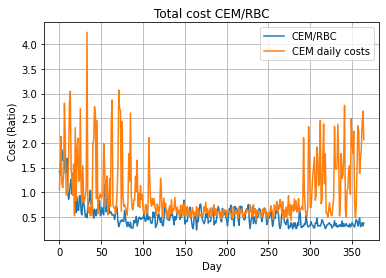

In [48]:
all_costs = agents.all_costs

all_costs = np.mean(all_costs, axis = 2)


time_RBC = int(RBC_THRESHOLD/24)
time_sim = int(end_time/24) - time_RBC  # Number of days simulation
time_end = int(end_time/24)

ramping_cost_CEM = []
ramping_cost_RBC = []
peak_electricity_cost_CEM = []
peak_electricity_cost_RBC = []

a = np.shape(E_grid_RBC)
print(a)
b = np.shape(RL_E_grid_pred)
print(b)

E_grid_RBC_used = E_grid_RBC[RBC_THRESHOLD: end_time,:]
RL_E_grid_pred_used = RL_E_grid_pred[0:24*time_sim,:] + RL_E_grid_sell[0:24*time_sim,:]

E_grid_RBC_used = E_grid_RBC_used.flatten().reshape(time_sim, 24, 9)
RL_E_grid_pred_used = RL_E_grid_pred_used.flatten().reshape(time_sim,24, 9)


ramping_cost_CEM = []
ramping_cost_RBC = []
peak_electricity_cost_CEM = []
peak_electricity_cost_RBC = []

for i in range(time_sim):
#     t_start = week + i * 24
#     t_end = week + (i + 1) * 24
    ramping_cost_CEM_t = []
    ramping_cost_RBC_t = []
    peak_electricity_cost_CEM_t = []
    peak_electricity_cost_RBC_t = []
    for bid in range(9):
        CEM_E_grid_t = RL_E_grid_pred_used[i,:,bid]
        RBC_Egrid_t = E_grid_RBC_used[i,:,bid]
        ramping_cost_CEM_t.append(np.sum(np.abs(CEM_E_grid_t[1:] - CEM_E_grid_t[:-1])))
        ramping_cost_RBC_t.append(np.sum(np.abs(RBC_Egrid_t[1:] - RBC_Egrid_t[:-1])))
        peak_electricity_cost_CEM_t.append(np.max(CEM_E_grid_t))
        peak_electricity_cost_RBC_t.append(np.max(RBC_Egrid_t))
    ramping_cost_CEM.append(ramping_cost_CEM_t)
    ramping_cost_RBC.append(ramping_cost_RBC_t)
    peak_electricity_cost_CEM.append(peak_electricity_cost_CEM_t)
    peak_electricity_cost_RBC.append(peak_electricity_cost_RBC_t)


CEM_cost = {
    "ramping_cost": np.array(ramping_cost_CEM).T,
    "peak_electricity_cost": np.array(peak_electricity_cost_CEM).T,
    "total_cost": np.array(ramping_cost_CEM).T
    + np.array(peak_electricity_cost_CEM).T,
}
RBC_cost = {
    "ramping_cost": np.array(ramping_cost_RBC).T,
    "peak_electricity_cost": np.array(peak_electricity_cost_RBC).T,
    "total_cost": np.array(ramping_cost_RBC).T + np.array(peak_electricity_cost_RBC).T,
}

item_cost = ["ramping_cost", "peak_electricity_cost", "total_cost"]
# for k in range(len(item_cost)):
#     fig, axs = plt.subplots(3, 3, figsize=(15, 15))
#     for i in range(3):
#         for j in range(3):
#             bid = i * 3 + j
#             axs[i, j].set_title(f"Building {bid + 1}: {item_cost[k]}")
#             axs[i, j].plot(
#                 CEM_cost[item_cost[k]][bid, :], label=f"CEM: {item_cost[k]}"
#             )  # plot true E grid
#             axs[i, j].plot(RBC_cost[item_cost[k]][bid, :], label=f"RBC: {item_cost[k]}")
#             axs[i, j].grid()
#             if j == 0:
#                 axs[i, j].set_ylabel("Cost")
#             if i == 0:
#                 axs[i, j].set_xlabel("Day")
#     plt.legend()

# for k in range(len(item_cost)):
# fig, axs = plt.subplots(3, 3, figsize=(15, 15))
# for i in range(3):
#     for j in range(3):
#         bid = i * 3 + j
#         axs[i, j].set_title(f"Building {bid + 1}: total cost CEM/RBC")
#         axs[i, j].plot(
#             CEM_cost["total_cost"][bid, :] / RBC_cost["total_cost"][bid, :],
#             label=f"CEM/RBC",
#         )  # plot true E grid
#         axs[i, j].grid()
#         if j == 0:
#             axs[i, j].set_ylabel("Cost (Ratio)")
#         if i == 0:
#                 axs[i, j].set_xlabel("Day")
# plt.legend()

# print(all_costs)

bid = [0, 1, 2, 4, 5, 6, 7, 8]

fig1, ax1 = plt.subplots()
ax1.set_title(f"Total cost CEM/RBC")
ax1.plot(np.sum(CEM_cost["total_cost"][bid],axis=0) / np.sum(RBC_cost["total_cost"][bid],axis=0),
            label=f"CEM/RBC")  # plot true E grid
ax1.plot(all_costs, label=f"CEM daily costs")
ax1.grid()
ax1.set_ylabel("Cost (Ratio)")
ax1.set_xlabel("Day")
plt.legend()

print(np.mean(np.sum(CEM_cost["total_cost"][bid],axis=0) / np.sum(RBC_cost["total_cost"][bid],axis=0)))



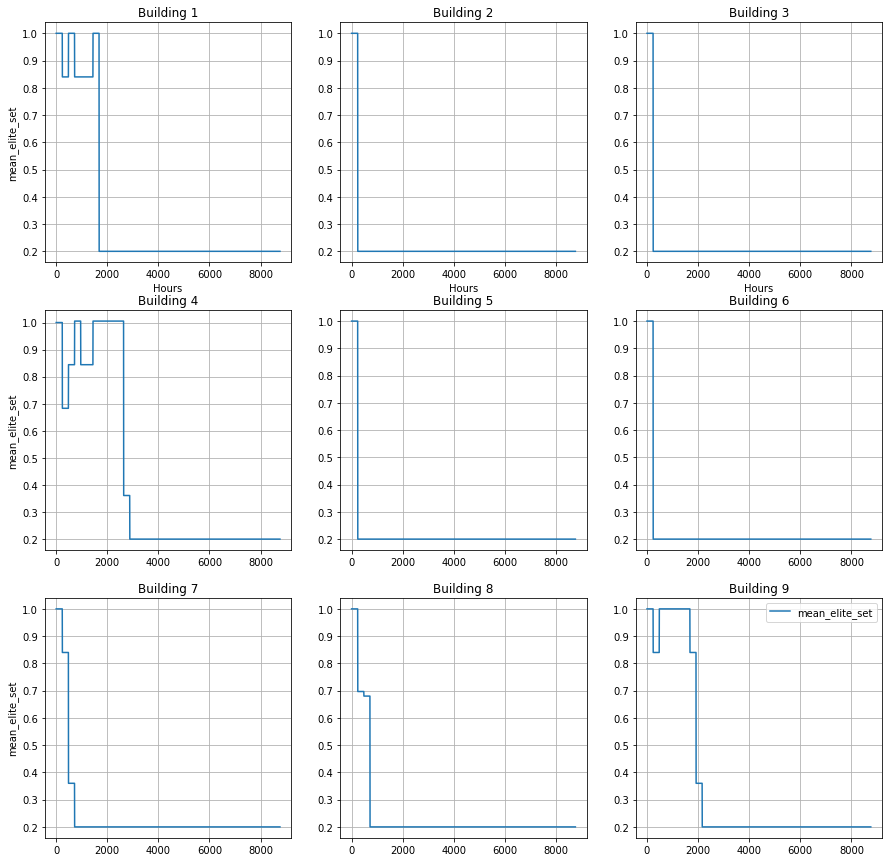

In [45]:
vars_RL = agents.logger
# print(len(vars_RL))

mean_elite_set = np.array(agents.mean_elite_set)

# print(np.shape(agents.mean_elite_set))

# p_ele_data = agents.p_ele_logger.reshape(len(vars_RL)*1*24,9)

# print(np.shape(agents.p_ele_logger))

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for j in range(3):
        bid = i * 3 + j
        axs[i, j].set_title(f"Building {bid + 1}")
        axs[i, j].plot(
            mean_elite_set[:,i*3+j],
            label="mean_elite_set",
        )   # plots per month
#         axs[i, j].plot(
#              E_grid_RBC[:,i*3+j], label="RBC E grid"
#          )  # plot true E grid
#         axs[i, j].plot(
#              RL_E_grid_pred[:,i*3+j], label="CEM RL_Egrid"
#          )  
        axs[i, j].grid()
        if j == 0:
            axs[i, j].set_ylabel("mean_elite_set")
        if i == 0:
            axs[i, j].set_xlabel("Hours")
plt.legend()
plt.show()

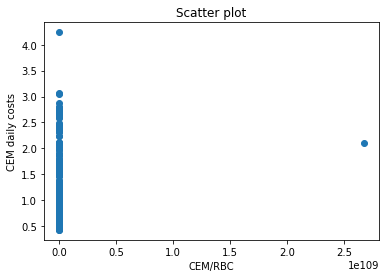

In [12]:
import numpy as np
import matplotlib.pyplot as plt


g1 = np.sum(CEM_cost["total_cost"],axis=0) /np.sum(RBC_cost["total_cost"],axis=0)
g1 = g1[0:365]
g2 = all_costs


plt.scatter(g1, g2)
plt.title('Scatter plot')
plt.xlabel('CEM/RBC')
plt.ylabel('CEM daily costs')
plt.show()




# list_data = list(range(366))
# list_data = tuple(list_data)

# colors = ("red", "green")
# groups = ("CEM/RBC", "CEM daily costs")

# # Create plot
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1, facecolor="1.0")



# for i, color, group in zip(list_data, colors, groups):
#     x = g1[i]
#     y = g2[i,:]
#     ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)


# plt.title('Matplot scatter plot')
# plt.legend(loc=2)
plt.show()

In [13]:
np.corrcoef(g1, g2.squeeze(1))

array([[1.        , 0.09643838],
       [0.09643838, 1.        ]])

In [14]:
print(np.shape(all_costs))
print(np.shape(np.sum(CEM_cost["total_cost"],axis=0) / np.sum(RBC_cost["total_cost"],axis=0)))
A = np.sum(CEM_cost["total_cost"],axis=0) /np.sum(RBC_cost["total_cost"],axis=0)
print(np.shape(A[0:365]))

(365, 1)
(365,)
(365,)


In [15]:
time_RBC = int(RBC_THRESHOLD/24)
time_sim = int(end_time/24) - time_RBC  # Number of days simulation

time_end = int(end_time/24)

print(time_sim)
print(time_RBC)
print(time_end)

365
14
379


In [16]:
import numpy as np

zeta_k = 0.2*np.ones(((1,24,9)))

zeta_k[:,0:5,:] = 0.2
zeta_k[:,6:10,:] = 0.4
zeta_k[:,11:14,:] = 2
zeta_k[:,15:17,:] = 3
zeta_k[:,18:21,:] = 0.4
zeta_k[:,22:23,:] = 0.2

print(zeta_k)

[[[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
  [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
  [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
  [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
  [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
  [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
  [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
  [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
  [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
  [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
  [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
  [2.  2.  2.  2.  2.  2.  2.  2.  2. ]
  [2.  2.  2.  2.  2.  2.  2.  2.  2. ]
  [2.  2.  2.  2.  2.  2.  2.  2.  2. ]
  [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
  [3.  3.  3.  3.  3.  3.  3.  3.  3. ]
  [3.  3.  3.  3.  3.  3.  3.  3.  3. ]
  [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
  [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
  [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
  [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
  [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
  [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
  [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]]]


In [17]:
zeta_k_list = np.ones(((4, 24, 9)))  # 4 different Zetas.

zeta_k_list[0,:,:] = np.ones((24,9))

print(np.shape(zeta_k_list[0,:,:]))

print(zeta_k_list[1,:,:])

(24, 9)
[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]
